Importing Libraries

In [1]:
import http.client
import json
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

Daily NFT Tranfers in February 2023

In [2]:
conn = http.client.HTTPSConnection("streaming.bitquery.io")
payload0 = json.dumps({
   "query": "{\n  EVM(dataset: combined, network: eth) {\n    Transfers(\n      orderBy: {ascending: Block_Date}\n      where: {Block: {Date: {since: \"2023-02-01\", till: \"2023-03-01\"}}, Transfer: {Currency: {Fungible: false}}}\n    ) {\n      Block {\n        Date\n      }\n      count\n    }\n  }\n}\n",
   "variables": "{}"
})
headers = {
   'Content-Type': 'application/json',
   'X-API-KEY': 'BQYdO11cbRp3kwtJsrLSTOHnuapbJL48'
}
conn.request("POST", "/graphql", payload0, headers)
res0 = conn.getresponse()
data0 = res0.read()
response0= json.loads(data0.decode("utf-8"))
# print(response0)

In [3]:
dt0= response0['data']['EVM']['Transfers']
df_nft_feb = pd.json_normalize(dt0)
df_nft_feb.head(5)

,count,Block.Date
0,276855,2023-02-01
1,234185,2023-02-02
2,288370,2023-02-03
3,287435,2023-02-04
4,264605,2023-02-05


In [4]:
df_nft_feb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   count       29 non-null     object
 1   Block.Date  29 non-null     object
dtypes: object(2)
memory usage: 592.0+ bytes


In [5]:
df_nft_feb['count'] =  pd.to_numeric(df_nft_feb['count'])
df_nft_feb['Block.Date'] = pd.to_datetime(df_nft_feb['Block.Date'])
df_nft_feb['Block.Date'] = df_nft_feb['Block.Date'].dt.day
df_nft_feb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   count       29 non-null     int64
 1   Block.Date  29 non-null     int64
dtypes: int64(2)
memory usage: 592.0 bytes


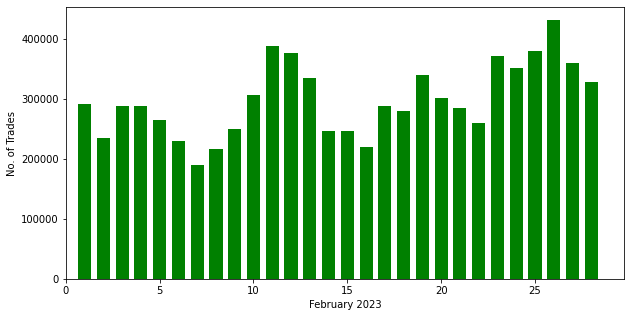

In [6]:
plt.figure(figsize= (10,5))
plt.bar(df_nft_feb['Block.Date'], df_nft_feb['count'], color='green', width=0.7)
plt.xlabel('February 2023')
plt.ylabel('No. of Trades')
plt.xlim(xmin=0)
plt.show()

Top traded NFTs by volume in February 2023

In [7]:
conn = http.client.HTTPSConnection("streaming.bitquery.io")
payload3 = json.dumps({
   "query": "{\n  EVM(dataset: combined, network: eth) {\n    Transfers(\n      orderBy: {descendingByField: \"count\"}\n      limit: {count: 30}\n      where: {Block: {Date: {since: \"2023-02-01\", till: \"2023-03-01\"}}, Transfer: {Currency: {Fungible: false}}}\n    ) {\n      Transfer {\n        Currency {\n          Symbol\n          SmartContract\n        }\n      }\n      count\n      senders: uniq(of: Transfer_Sender, method: approximate)\n      receivers: uniq(of: Transfer_Receiver, method: approximate)\n      ids: uniq(of: Transfer_Id, method: approximate)\n    }\n  }\n}\n",
   "variables": "{}"
})

conn.request("POST", "/graphql", payload3, headers)
res3 = conn.getresponse()
data3 = res3.read()
response3= json.loads(data3.decode("utf-8"))

dt_top_nfts_feb= response3['data']['EVM']['Transfers']
df_top_nfts_feb = pd.json_normalize(dt_top_nfts_feb)
df_top_nfts_feb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   count                            30 non-null     object
 1   ids                              30 non-null     object
 2   receivers                        30 non-null     object
 3   senders                          30 non-null     object
 4   Transfer.Currency.SmartContract  30 non-null     object
 5   Transfer.Currency.Symbol         30 non-null     object
dtypes: object(6)
memory usage: 1.5+ KB


In [8]:
df_top_nfts_feb['count'] = pd.to_numeric(df_top_nfts_feb['count'])
df_top_nfts_feb['senders'] = pd.to_numeric(df_top_nfts_feb['senders'])
df_top_nfts_feb['receivers'] = pd.to_numeric(df_top_nfts_feb['receivers'])
df_top_nfts_feb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   count                            30 non-null     int64 
 1   ids                              30 non-null     object
 2   receivers                        30 non-null     int64 
 3   senders                          30 non-null     int64 
 4   Transfer.Currency.SmartContract  30 non-null     object
 5   Transfer.Currency.Symbol         30 non-null     object
dtypes: int64(3), object(3)
memory usage: 1.5+ KB


In [9]:
df_top_nfts_feb = df_top_nfts_feb.drop([df_top_nfts_feb.index[2], df_top_nfts_feb.index[9], df_top_nfts_feb.index[25]])
df_top_nfts_feb

,count,ids,receivers,senders,Transfer.Currency.SmartContract,Transfer.Currency.Symbol
0,541708,403757,401885,96151,0xd4307e0acd12cf46fd6cf93bc264f5d5d1598792,BASEINTRODUCED
1,115391,39116,11720,7895,0x7c10c8816575e8fdfb11463dd3811cc794a1d407,UINTS
3,80340,12622,11243,12630,0x6339e5e072086621540d0362c4e3cea0d643e114,OPEPEN
4,75355,19857,11829,10173,0xbd8451d2d5fb88469a764b05c1e0b623c5106145,VVMRG
5,65917,63243,3912,159,0xac38e9d5102c19d9961d0b92c572cc1c0e280ef2,STONE
6,64422,63891,2658,112,0x62a08a59046b2bd7045042dcab7c04d136d3b1df,FPP
7,51635,9719,6247,7624,0x34d85c9cdeb23fa97cb08333b511ac86e1c4e258,OTHR
8,48729,34036,23815,13493,0x495f947276749ce646f68ac8c248420045cb7b5e,OPENSTORE
10,42117,7,17566,9030,0xe70659b717112ac4e14284d0db2f5d5703df8e43,PROJECTX
11,41213,60,14510,11974,0x66ec993bc3b6f235583a64a67bd4d6d9d5ac84d5,KSP


In [10]:
df_top_nfts_feb =  df_top_nfts_feb.drop(df_top_nfts_feb.index[0])

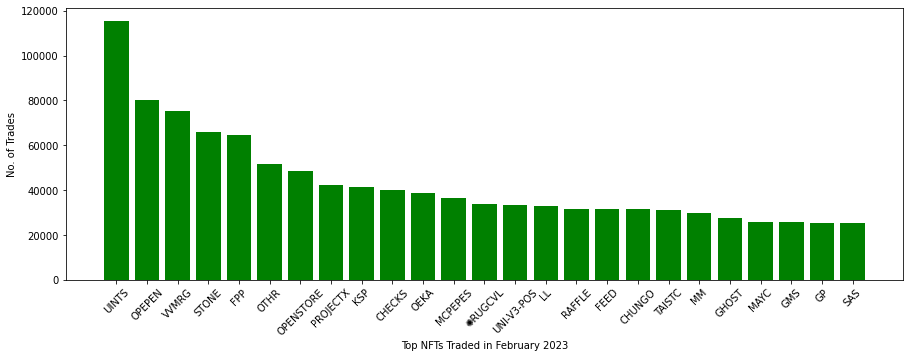

In [11]:
plt.figure(figsize=(15,5))
plt.bar(df_top_nfts_feb['Transfer.Currency.Symbol'], df_top_nfts_feb['count'], color='green')
plt.xlabel('Top NFTs Traded in February 2023')
plt.ylabel('No. of Trades')
plt.xticks(rotation=45)
plt.show() 

Omitted: Base, Introduced NFTs received 500k+ trades 

NFT Transfers During Regulators packed period in September 2023

In [12]:

conn = http.client.HTTPSConnection("streaming.bitquery.io")
payload = json.dumps({
   "query": "{\n  EVM(dataset: combined, network: eth) {\n    Transfers(\n      orderBy: {ascending: Block_Date}\n      where: {Block: {Date: {since: \"2023-9-01\", till: \"2023-10-01\"}}, Transfer: {Currency: {Fungible: false}}}\n    ) {\n      Block {\n        Date\n      }\n      count\n    }\n  }\n}\n",
   "variables": "{}"
})
headers = {
   'Content-Type': 'application/json',
   'X-API-KEY': 'BQYdO11cbRp3kwtJsrLSTOHnuapbJL48'
}
conn.request("POST", "/graphql", payload, headers)
res = conn.getresponse()
data = res.read()
response= json.loads(data.decode("utf-8"))
# print(response)


In [13]:
data_table= response['data']['EVM']['Transfers']
df_nft_sept = pd.json_normalize(data_table)
df_nft_sept.head(5)

,count,Block.Date
0,145637,2023-09-01
1,104272,2023-09-02
2,93897,2023-09-03
3,125071,2023-09-04
4,160966,2023-09-05


In [14]:
df_nft_sept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   count       31 non-null     object
 1   Block.Date  31 non-null     object
dtypes: object(2)
memory usage: 624.0+ bytes


In [15]:
df_nft_sept['count'] =  pd.to_numeric(df_nft_sept['count'])
df_nft_sept['Block.Date'] = pd.to_datetime(df_nft_sept['Block.Date'])
df_nft_sept['Block.Date'] = df_nft_sept['Block.Date'].dt.day
df_nft_sept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   count       31 non-null     int64
 1   Block.Date  31 non-null     int64
dtypes: int64(2)
memory usage: 624.0 bytes


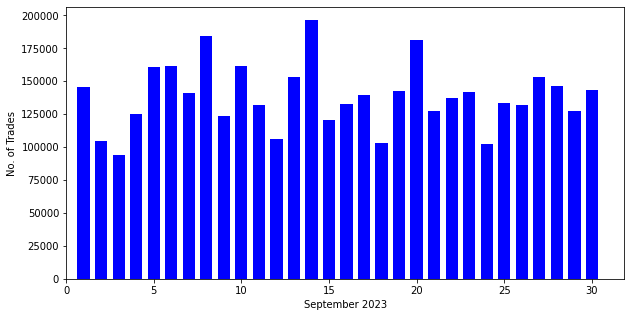

In [16]:
plt.figure(figsize= (10,5))
plt.bar(df_nft_sept['Block.Date'], df_nft_sept['count'], color='blue', width=0.7)
plt.xlim(xmin=0)
plt.xlabel('September 2023')
plt.ylabel('No. of Trades')
plt.show()

In [17]:
conn = http.client.HTTPSConnection("streaming.bitquery.io")
payload2 = json.dumps({
   "query": "{\n  EVM(dataset: combined, network: eth) {\n    Transfers(\n      orderBy: {descendingByField: \"count\"}\n      limit: {count: 30}\n      where: {Block: {Date: {since: \"2023-09-01\", till: \"2023-10-01\"}}, Transfer: {Currency: {Fungible: false}}}\n    ) {\n      Transfer {\n        Currency {\n          Symbol\n          SmartContract\n        }\n      }\n      count\n      senders: uniq(of: Transfer_Sender, method: approximate)\n      receivers: uniq(of: Transfer_Receiver, method: approximate)\n      ids: uniq(of: Transfer_Id, method: approximate)\n    }\n  }\n}\n",
   "variables": "{}"
})
conn.request("POST", "/graphql", payload2, headers)
res2 = conn.getresponse()
data2 = res2.read()
response2= json.loads(data2.decode("utf-8"))
# print(response2)

In [18]:
dt_top_nfts_sept = response2['data']['EVM']['Transfers']
df_top_nfts_sept = pd.json_normalize(dt_top_nfts_sept)
df_top_nfts_sept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   count                            30 non-null     object
 1   ids                              30 non-null     object
 2   receivers                        30 non-null     object
 3   senders                          30 non-null     object
 4   Transfer.Currency.SmartContract  30 non-null     object
 5   Transfer.Currency.Symbol         30 non-null     object
dtypes: object(6)
memory usage: 1.5+ KB


In [19]:
df_top_nfts_sept['count'] = pd.to_numeric(df_top_nfts_sept['count'])
df_top_nfts_sept['senders'] = pd.to_numeric(df_top_nfts_sept['senders'])
df_top_nfts_sept['receivers'] = pd.to_numeric(df_top_nfts_sept['receivers'])
df_top_nfts_sept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   count                            30 non-null     int64 
 1   ids                              30 non-null     object
 2   receivers                        30 non-null     int64 
 3   senders                          30 non-null     int64 
 4   Transfer.Currency.SmartContract  30 non-null     object
 5   Transfer.Currency.Symbol         30 non-null     object
dtypes: int64(3), object(3)
memory usage: 1.5+ KB


In [20]:
df_top_nfts_sept

,count,ids,receivers,senders,Transfer.Currency.SmartContract,Transfer.Currency.Symbol
0,171735,170626,12777,656,0x3539ac68bc96fc1f470d7739a49bbbf3d321fd5d,B-BRN
1,82108,250,81699,2,0x699a884a3e41bbab0b9b68ac6d749e64cbe3ea7b,USDCGOLD.COM
2,78081,77906,8730,29,0x7183bb21a9fd0cd2af098895c0e470b7f61c4a17,CARELLA
3,75407,38130,1313,1101,0x6b343dc8d8bf3941e34701bf93782537ef66f140,WPART
4,72000,1,72233,1,0xb759b80efd95c17c3ef82fcf0b94c1df4c72c83a,Voucher
5,61151,45978,6247,9344,0x57f1887a8bf19b14fc0df6fd9b2acc9af147ea85,
6,52022,49566,6907,629,0x33edfa311fd59942bdc7713a6e45feece9c459c8,ORG
7,50614,600,50002,2,0xc63d4171dfa493a1566ad747cb514b02a392b02c,UNI Airdrop Pass
8,49462,49453,49455,1,0x0000000000664ceffed39244a8312bd895470803,FUNPASS
9,46956,46949,46954,1,0xd2bdd497db05622576b6cb8082fb08de042987ca,CHEST


In [21]:
# df_top_nfts.head(5)
df_top_nfts_sept = df_top_nfts_sept.drop([df_top_nfts_sept.index[5], df_top_nfts_sept.index[14]])
# df_top_nfts['Transfer.Currency.Symbol'].isnull()
df_top_nfts_sept

,count,ids,receivers,senders,Transfer.Currency.SmartContract,Transfer.Currency.Symbol
0,171735,170626,12777,656,0x3539ac68bc96fc1f470d7739a49bbbf3d321fd5d,B-BRN
1,82108,250,81699,2,0x699a884a3e41bbab0b9b68ac6d749e64cbe3ea7b,USDCGOLD.COM
2,78081,77906,8730,29,0x7183bb21a9fd0cd2af098895c0e470b7f61c4a17,CARELLA
3,75407,38130,1313,1101,0x6b343dc8d8bf3941e34701bf93782537ef66f140,WPART
4,72000,1,72233,1,0xb759b80efd95c17c3ef82fcf0b94c1df4c72c83a,Voucher
6,52022,49566,6907,629,0x33edfa311fd59942bdc7713a6e45feece9c459c8,ORG
7,50614,600,50002,2,0xc63d4171dfa493a1566ad747cb514b02a392b02c,UNI Airdrop Pass
8,49462,49453,49455,1,0x0000000000664ceffed39244a8312bd895470803,FUNPASS
9,46956,46949,46954,1,0xd2bdd497db05622576b6cb8082fb08de042987ca,CHEST
10,45099,90,45002,2,0x89430ac32b6e5386d9554d2253c37160556acd70,HEX Pool Position


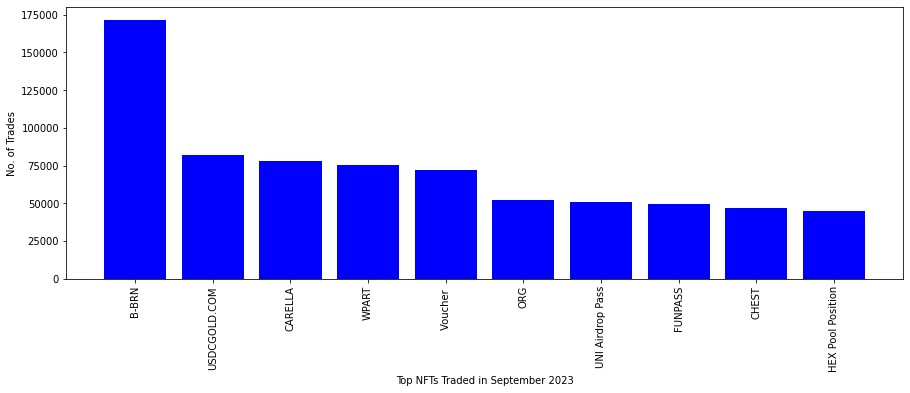

In [22]:

plt.figure(figsize=(15,5))
plt.bar(df_top_nfts_sept['Transfer.Currency.Symbol'].head(10), df_top_nfts_sept['count'].head(10), color='blue')
plt.xticks(rotation=90)
plt.xlabel('Top NFTs Traded in September 2023')
plt.ylabel('No. of Trades')
plt.show() 

Comparing Best and Worst Month for NFTs in 2023

In [23]:
df_nft_feb = df_nft_feb.drop(df_nft_feb.index[28])

In [24]:
df_nft_sept = df_nft_sept.drop(df_nft_sept.index[30])

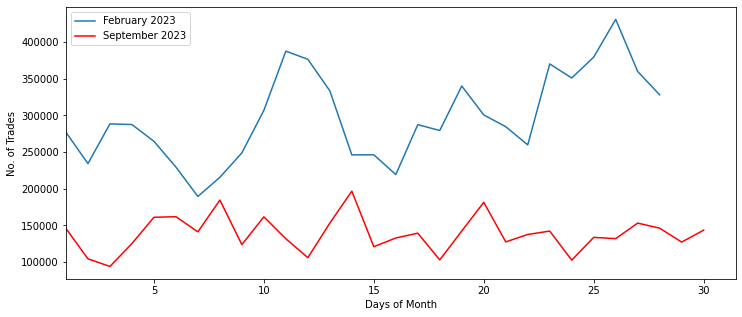

In [25]:
plt.figure(figsize=(12,5))
plt.plot(df_nft_feb['Block.Date'], df_nft_feb['count'])
plt.plot(df_nft_sept['Block.Date'], df_nft_sept['count'], color='red' )
plt.xlabel('Days of Month')
plt.ylabel('No. of Trades')
plt.legend(["February 2023", "September 2023"], loc ="upper left") 
plt.xlim(xmin=1)
plt.show()


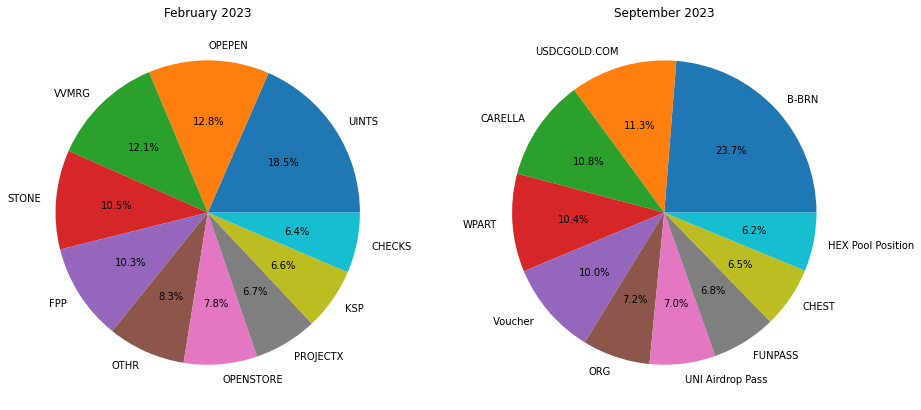

In [26]:
fig = plt.figure(figsize =(15, 7))

ax1 = fig.add_subplot(121)
ax1.pie(df_top_nfts_feb['count'].head(10), labels = df_top_nfts_feb['Transfer.Currency.Symbol'].head(10), autopct='%1.1f%%')
ax2 = fig.add_subplot(122)
ax2.pie(df_top_nfts_sept['count'].head(10), labels = df_top_nfts_sept['Transfer.Currency.Symbol'].head(10), autopct='%1.1f%%')
# plt.xlabel('February 2023')
# plt.xlabel('September 2023')
ax1.set_title('February 2023')
ax2.set_title('September 2023')
plt.show()

Latest trending NFTs on OpenSea (November 2023)

In [27]:
conn = http.client.HTTPSConnection("streaming.bitquery.io")
payload4 = json.dumps({
   "query": "{\n  EVM(dataset: combined, network: eth) {\n    Transfers(\n      orderBy: {descendingByField: \"count\"}\n      limit: {offset: 10, count: 30}\n      where: {Block: {Date: {since: \"2023-11-01\", till: \"2023-11-17\"}}, Transfer: {Currency: {Fungible: false, Symbol: {not: \"Airdrop\"}}}}\n    ) {\n      Transfer {\n        Currency {\n          Symbol\n          SmartContract\n        }\n      }\n      count\n      senders: uniq(of: Transfer_Sender, method: approximate)\n      receivers: uniq(of: Transfer_Receiver, method: approximate)\n      ids: uniq(of: Transfer_Id, method: approximate)\n    }\n  }\n}\n",
   "variables": "{}"
})
conn.request("POST", "/graphql", payload4, headers)
res4 = conn.getresponse()
data4 = res4.read()
response4= json.loads(data4.decode("utf-8"))
# print(response4)

In [28]:
top_nft_seaport = response4['data']['EVM']['Transfers']
top_nft_seaport = pd.json_normalize(top_nft_seaport)
top_nft_seaport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   count                            30 non-null     object
 1   ids                              30 non-null     object
 2   receivers                        30 non-null     object
 3   senders                          30 non-null     object
 4   Transfer.Currency.SmartContract  30 non-null     object
 5   Transfer.Currency.Symbol         30 non-null     object
dtypes: object(6)
memory usage: 1.5+ KB


In [29]:
top_nft_seaport['receivers'] = pd.to_numeric(top_nft_seaport['receivers'])
top_nft_seaport['count'] = pd.to_numeric(top_nft_seaport['count'])
top_nft_seaport['senders'] = pd.to_numeric(top_nft_seaport['senders'])
top_nft_seaport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   count                            30 non-null     int64 
 1   ids                              30 non-null     object
 2   receivers                        30 non-null     int64 
 3   senders                          30 non-null     int64 
 4   Transfer.Currency.SmartContract  30 non-null     object
 5   Transfer.Currency.Symbol         30 non-null     object
dtypes: int64(3), object(3)
memory usage: 1.5+ KB


In [30]:
top_nft_seaport = top_nft_seaport.drop([top_nft_seaport.index[2]])


In [31]:
top_nft_seaport

,count,ids,receivers,senders,Transfer.Currency.SmartContract,Transfer.Currency.Symbol
0,16352,15376,907,130,0x72dc0bc117c6f5d912bc04a4a4c33635dea9ac94,Simply
1,15748,15715,239,30,0x3539ac68bc96fc1f470d7739a49bbbf3d321fd5d,B-BRN
3,11483,10955,8960,666,0xd4416b13d2b3a9abae7acd5d6c2bbdbe25686401,
4,10917,2988,4943,3842,0x5f36809a7c15ebcc00221217cd17914ffd3e4762,NPK
5,10412,3333,2334,1550,0x12dd66366d45f44128083233c6fbadfe7cbae221,FIJI
6,10375,10000,437,55,0xc9ab0e6a7654b29fcaa95b29e4c7a97b6b6916a9,PT
7,10365,10000,424,74,0x1be440b9d0a6595290c201f640ccd815cbc55168,LOAD
8,10131,10000,116,5,0xabe8414cfd6270cd4ba42ce96e11dce3de8d3906,sellit
9,10002,2,10002,2,0x229e038e1e2d8e267e11200f104d51979a14a355,Official Authorize credential
10,10002,10000,2,3,0x1589a833149de59aac6fa7ff0ab9d535adc7016d,CP


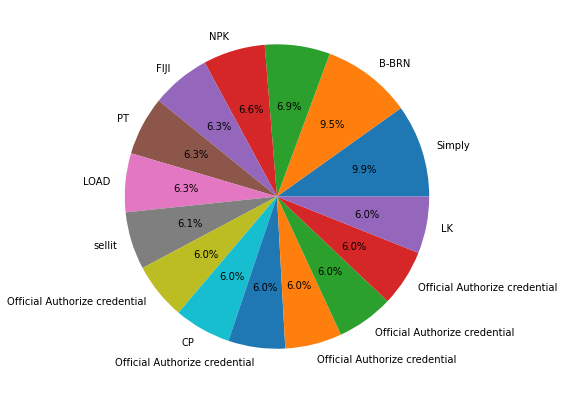

In [32]:
fig = plt.figure(figsize= (7,7))
plt.pie(top_nft_seaport['count'].head(15), labels =  top_nft_seaport['Transfer.Currency.Symbol'].head(15), autopct='%1.1f%%')
plt.show()

Average Price for SOC during 6-8 November

In [33]:
conn = http.client.HTTPSConnection("streaming.bitquery.io")
payload5 = json.dumps({
   "query": "query ($network: evm_network) {\n  EVM(network: $network, dataset: combined) {\n    DEXTradeByTokens(\n      orderBy: {descendingByField: \"Trade_Price\"}\n      limit: {}\n      where: {Trade: {Currency: {SmartContract: {is: \"0xFC8a98C22A9E32948aB028414d67C62c49B16864\"}}}, Block: {Date: {since: \"2023-11-6\", till: \"2023-11-8\"}}}\n    ) {\n      ChainId\n      Block {\n        Number\n        Time\n      }\n      Trade {\n        Seller\n        Buyer\n        Amount\n        Currency {\n          SmartContract\n          Symbol\n        }\n        Price\n        Side {\n          Amount\n          Currency {\n            SmartContract\n            Symbol\n          }\n        }\n      }\n      Transaction {\n        Hash\n      }\n    }\n  }\n}\n",
   "variables": "{\"network\":\"eth\",\"limit\":10,\"offset\":0,\"token\":\"0xFC8a98C22A9E32948aB028414d67C62c49B16864\"}"
})
conn.request("POST", "/graphql", payload5, headers)
res = conn.getresponse()
data = res.read()
response5  = json.loads(data.decode("utf-8"))
# print(response5)

In [34]:
price_soc_6nov_8nov = response5['data']['EVM']['DEXTradeByTokens']
price_soc_6nov_8nov = pd.json_normalize(price_soc_6nov_8nov)
price_soc_6nov_8nov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ChainId                            1056 non-null   object 
 1   Block.Number                       1056 non-null   object 
 2   Block.Time                         1056 non-null   object 
 3   Trade.Amount                       1056 non-null   object 
 4   Trade.Buyer                        1056 non-null   object 
 5   Trade.Currency.SmartContract       1056 non-null   object 
 6   Trade.Currency.Symbol              1056 non-null   object 
 7   Trade.Price                        1056 non-null   float64
 8   Trade.Seller                       1056 non-null   object 
 9   Trade.Side.Amount                  1056 non-null   object 
 10  Trade.Side.Currency.SmartContract  1056 non-null   object 
 11  Trade.Side.Currency.Symbol         1056 non-null   objec

In [35]:
ETH_price_soc_6nov_8nov = price_soc_6nov_8nov[price_soc_6nov_8nov['Trade.Side.Currency.Symbol'] == "ETH"]
# ETH_price_soc_6nov_8nov


In [36]:
WETH_price_soc_6nov_8nov = price_soc_6nov_8nov[price_soc_6nov_8nov['Trade.Side.Currency.Symbol'] == "WETH"]
# WETH_price_soc_6nov_8nov

In [37]:
ETH_avg_6_8 = ETH_price_soc_6nov_8nov['Trade.Price'].mean() 
WETH_avg_6_8 = WETH_price_soc_6nov_8nov['Trade.Price'].mean()
print("Average ETH price: " + str(round(ETH_avg_6_8, 3)) + "\nAvg WETH price: " + str(round(WETH_avg_6_8, 3)))

Average ETH price: 5.017
Avg WETH price: 6.076


Average Top Price for SOC during 4-6 November

In [38]:
conn = http.client.HTTPSConnection("streaming.bitquery.io")
payload6 = json.dumps({
   "query": "query ($network: evm_network) {\n  EVM(network: $network, dataset: combined) {\n    DEXTradeByTokens(\n      orderBy: {descendingByField: \"Trade_Price\"}\n      limit: {}\n      where: {Trade: {Currency: {SmartContract: {is: \"0xFC8a98C22A9E32948aB028414d67C62c49B16864\"}}}, Block: {Date: {since: \"2023-11-4\", till: \"2023-11-6\"}}}\n    ) {\n      ChainId\n      Block {\n        Number\n        Time\n      }\n      Trade {\n        Seller\n        Buyer\n        Amount\n        Currency {\n          SmartContract\n          Symbol\n        }\n        Price\n        Side {\n          Amount\n          Currency {\n            SmartContract\n            Symbol\n          }\n        }\n      }\n      Transaction {\n        Hash\n      }\n    }\n  }\n}\n",
   "variables": "{\"network\":\"eth\",\"limit\":10,\"offset\":0,\"token\":\"0xFC8a98C22A9E32948aB028414d67C62c49B16864\"}"
})
conn.request("POST", "/graphql", payload6, headers)
res = conn.getresponse()
data = res.read()
response  = json.loads(data.decode("utf-8"))
# print(response)

In [39]:
price_soc_4nov_6nov = response['data']['EVM']['DEXTradeByTokens']
price_soc_4nov_6nov = pd.json_normalize(price_soc_4nov_6nov)
price_soc_4nov_6nov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ChainId                            246 non-null    object 
 1   Block.Number                       246 non-null    object 
 2   Block.Time                         246 non-null    object 
 3   Trade.Amount                       246 non-null    object 
 4   Trade.Buyer                        246 non-null    object 
 5   Trade.Currency.SmartContract       246 non-null    object 
 6   Trade.Currency.Symbol              246 non-null    object 
 7   Trade.Price                        246 non-null    float64
 8   Trade.Seller                       246 non-null    object 
 9   Trade.Side.Amount                  246 non-null    object 
 10  Trade.Side.Currency.SmartContract  246 non-null    object 
 11  Trade.Side.Currency.Symbol         246 non-null    object 

In [40]:
price_soc_4nov_6nov.head(5)

,ChainId,Block.Number,Block.Time,Trade.Amount,Trade.Buyer,Trade.Currency.SmartContract,Trade.Currency.Symbol,Trade.Price,Trade.Seller,Trade.Side.Amount,Trade.Side.Currency.SmartContract,Trade.Side.Currency.Symbol,Transaction.Hash
0,1,18500909,2023-11-04T19:59:23Z,1,0xa0ad42ab575e0efde656500bdcc55c1f376858db,0xfc8a98c22a9e32948ab028414d67c62c49b16864,SOC,7.949126,0x03519d8bccb63e677f3790a9ca5377d4e8df4001,0.125800000000000000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,0x6e3d0df17052c2cc43fc5969355a6380f8fd6c4929b0...
1,1,18500909,2023-11-04T19:59:23Z,1,0xa0ad42ab575e0efde656500bdcc55c1f376858db,0xfc8a98c22a9e32948ab028414d67c62c49b16864,SOC,7.949126,0x03519d8bccb63e677f3790a9ca5377d4e8df4001,0.125800000000000000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,0x6e3d0df17052c2cc43fc5969355a6380f8fd6c4929b0...
2,1,18497073,2023-11-04T07:05:11Z,1,0xa7194f8a5f509ed2c95ade0b4efb6940a45d7a11,0xfc8a98c22a9e32948ab028414d67c62c49b16864,SOC,7.943285,0x60785d49d0bb61dd0204b2f72a23e2f9775f0576,0.125892500000000000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,0x8fa5c991a12531cc1b82979687d8d915ca0f53c1d626...
3,1,18497073,2023-11-04T07:05:11Z,1,0xa7194f8a5f509ed2c95ade0b4efb6940a45d7a11,0xfc8a98c22a9e32948ab028414d67c62c49b16864,SOC,7.943285,0x60785d49d0bb61dd0204b2f72a23e2f9775f0576,0.125892500000000000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,0x8fa5c991a12531cc1b82979687d8d915ca0f53c1d626...
4,1,18500452,2023-11-04T18:27:47Z,1,0xa7194f8a5f509ed2c95ade0b4efb6940a45d7a11,0xfc8a98c22a9e32948ab028414d67c62c49b16864,SOC,7.931629,0xcd87c64d1a350e3688b9dcae6473118f7b91b782,0.126077500000000000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,0x5854257102f0ca7cfaff577353b595f35bbedce2f75c...


In [41]:
ETH_price_soc_4nov_6nov = price_soc_4nov_6nov[price_soc_4nov_6nov['Trade.Side.Currency.Symbol'] == "ETH"]
WETH_price_soc_4nov_6nov = price_soc_4nov_6nov[price_soc_4nov_6nov['Trade.Side.Currency.Symbol'] == "WETH"]


In [42]:
ETH_avg_4_6 = ETH_price_soc_4nov_6nov['Trade.Price'].mean() 
WETH_avg_4_6 = WETH_price_soc_4nov_6nov['Trade.Price'].mean()
print("Average ETH price: " + str(round(ETH_avg_4_6, 3)) + "\nAvg WETH price: " + str(round(WETH_avg_4_6, 3)))

Average ETH price: 6.291
Avg WETH price: 7.22


Compairing SOC NFTs prices in USD on the given dates

In [43]:
ETH_4_6_USD = round(ETH_avg_4_6* 1883.02)
WETH_4_6_USD = round(WETH_avg_4_6*1899.31)
ETH_6_8_USD = round(ETH_avg_6_8* 1882.08	)
WETH_6_8_USD = round(WETH_avg_6_8*1891.51)
USD_4_6 = (ETH_4_6_USD + WETH_4_6_USD)/2
USD_6_8 = (ETH_6_8_USD + WETH_6_8_USD)/2
print("Avg USD price (4-6 Nov) : " + str(USD_4_6) + "\nAvg USD Price (6-8 Nov) " + str(USD_6_8))

Avg USD price (4-6 Nov) : 12779.0
Avg USD Price (6-8 Nov) 10468.0
